In [32]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv('aggregated.csv')
weather = pd.read_csv('aggregated_weather.csv')
df['time'] = pd.to_datetime(df['time'])
weather['time'] = pd.to_datetime(weather['time'])
total = pd.read_csv('zone21aggregated.csv')
total['time'] = pd.to_datetime(total['time'])
total.index = total['time']
total['value'].fillna(method="ffill")

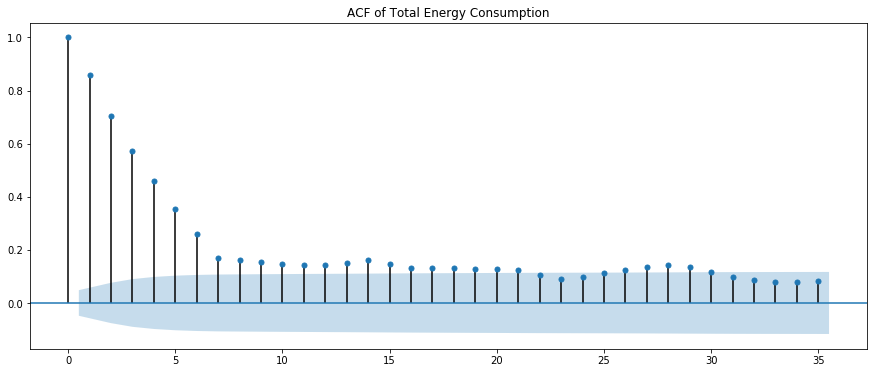

In [72]:
getAutocorrelationPlot(total)

In [137]:
def getstr(x):
    return x.get_string()
total['day'] = total['time'].apply(lambda x:x.strftime("%m %HH"))
total['month'] = total['time'].apply(lambda x: x.strftime('%m'))

In [71]:
def getAutocorrelationPlot(data, lags=50,resample='D', title = 'ACF of Total Energy Consumption'):
    # from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    lags = [1,24,48,96,168, 720, 744, 8760]
    plt.close()
    fig, ax = plt.subplots(figsize=(15, 6))
    df = data.resample(resample).sum()
    plot_acf(df['value'].fillna(method="ffill"), lags=35, ax=ax, title=title)
    plt.show()

In [142]:
def getViolinPlot(data, x):
    plt.close()
    fig, ax = plt.subplots(figsize=(120, 8))
    sns.boxplot(x=x, y='value', data=data, ax=ax, hue='month')
    plt.show()

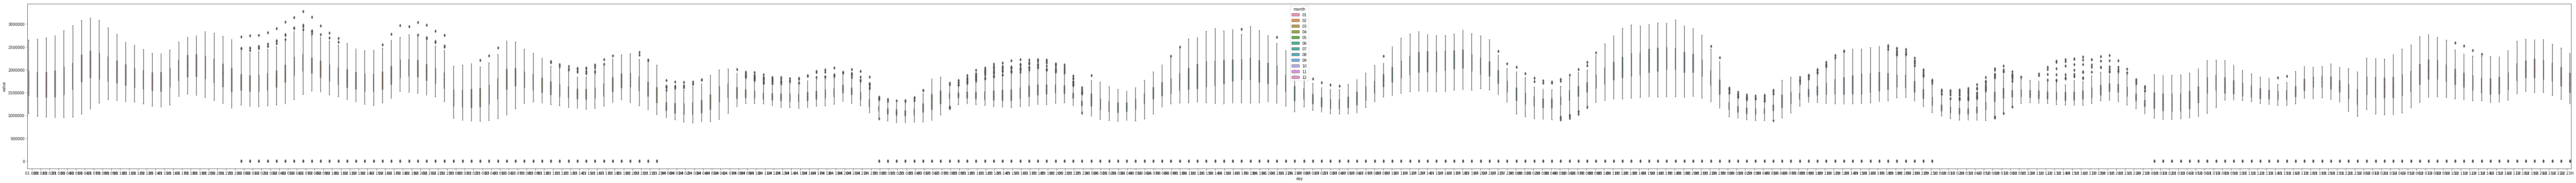

In [143]:
getViolinPlot(total, 'day')

In [86]:
total

,value,time,weekday
time,,,
2004-01-01 00:00:00,1397668,2004-01-01 00:00:00,3
2004-01-01 01:00:00,1351507,2004-01-01 01:00:00,3
2004-01-01 02:00:00,1315742,2004-01-01 02:00:00,3
2004-01-01 03:00:00,1308023,2004-01-01 03:00:00,3
2004-01-01 04:00:00,1344117,2004-01-01 04:00:00,3
...,...,...,...
2008-07-07 19:00:00,0,2008-07-07 19:00:00,0
2008-07-07 20:00:00,0,2008-07-07 20:00:00,0
2008-07-07 21:00:00,0,2008-07-07 21:00:00,0
